In [422]:
#importing libraries
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [423]:
#loading dataset
df = pd.read_csv('/content/Breast Cancer Wisconsin (Diagnostic) -wbc.csv')


In [424]:
df.columns = ['id',
'diagnosis',
'radius_mean',
'texture_mean',
'perimeter_mean',
'area_mean',
'smoothness_mean',
'compactness_mean',
'concavity_mean',
'concave points_mean',
'symmetry_mean',
'fractal_dimension_mean',
'radius_se',
'texture_se',
'perimeter_se',
'area_se',
'smoothness_se',
'compactness_se',
'concavity_se',
'concave points_se',
'symmetry_se',
'fractal_dimension_se',
'radius_worst',
'texture_worst',
'perimeter_worst',
'area_worst',
'smoothness_worst',
'compactness_worst',

'concavity_worst',
'concave points_worst',
'symmetry_worst','fractal_dimension_worst'

]
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       568 non-null    int64  
 1   diagnosis                568 non-null    object 
 2   radius_mean              568 non-null    float64
 3   texture_mean             568 non-null    float64
 4   perimeter_mean           568 non-null    float64
 5   area_mean                568 non-null    float64
 6   smoothness_mean          568 non-null    float64
 7   compactness_mean         568 non-null    float64
 8   concavity_mean           568 non-null    float64
 9   concave points_mean      568 non-null    float64
 10  symmetry_mean            568 non-null    float64
 11  fractal_dimension_mean   568 non-null    float64
 12  radius_se                568 non-null    float64
 13  texture_se               568 non-null    float64
 14  perimeter_se             5

In [426]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [427]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,3.042382e+07,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,1.251246e+08,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,9.061570e+05,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,8.825022e+06,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [428]:
df.shape

(568, 32)

In [429]:
# M" stands for "Malignant": This indicates that the tumor is cancerous

# "B" stands for "Benign": This indicates that the tumor is not cancerous

In [430]:
#Encoding categorical data into numerical
label = LabelEncoder()
df["diagnosis"]=label.fit_transform(df["diagnosis"])
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### ***Data Visualization***


<Axes: xlabel='diagnosis', ylabel='count'>

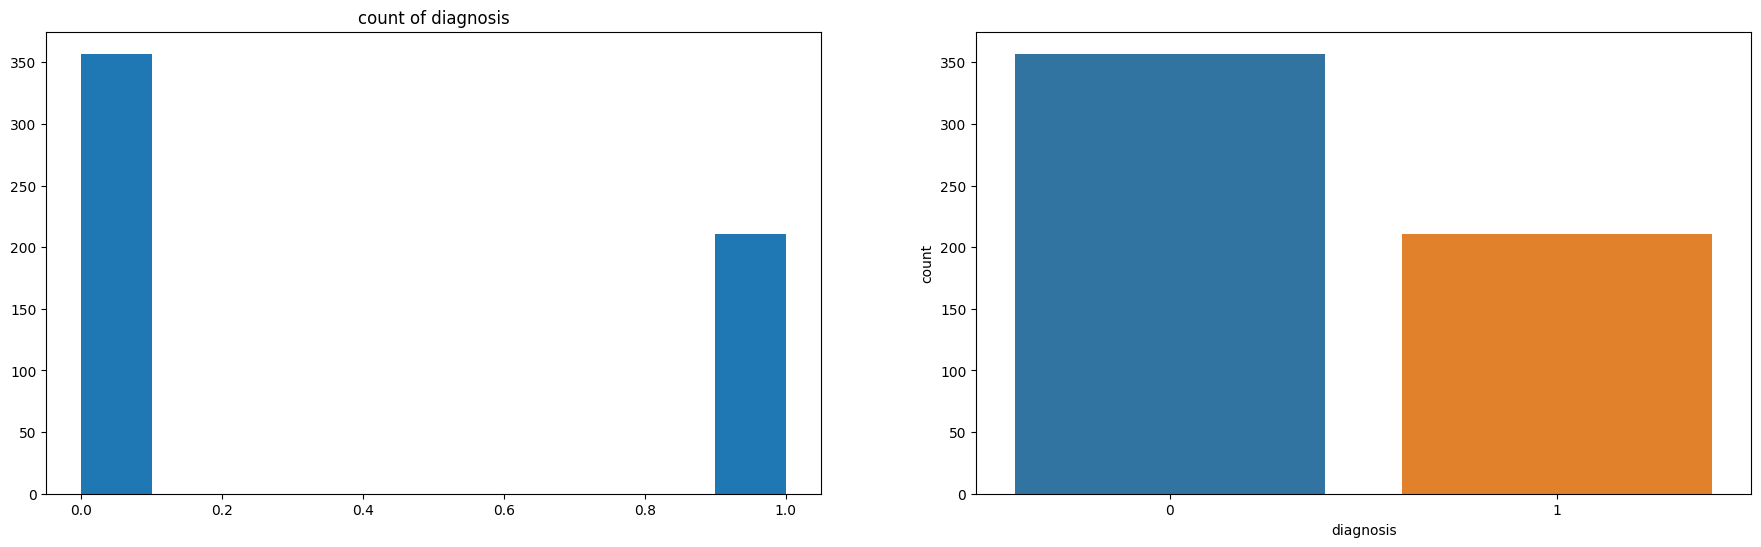

In [431]:
plt.figure(figsize=(22,6))

plt.subplot(1, 2, 1)
plt.xlabel=('Diagnosis')
plt.title('count of diagnosis')
plt.hist(df.diagnosis)


plt.subplot(1, 2, 2)
sns.countplot(x='diagnosis',data=df)




<Figure size 2200x600 with 0 Axes>

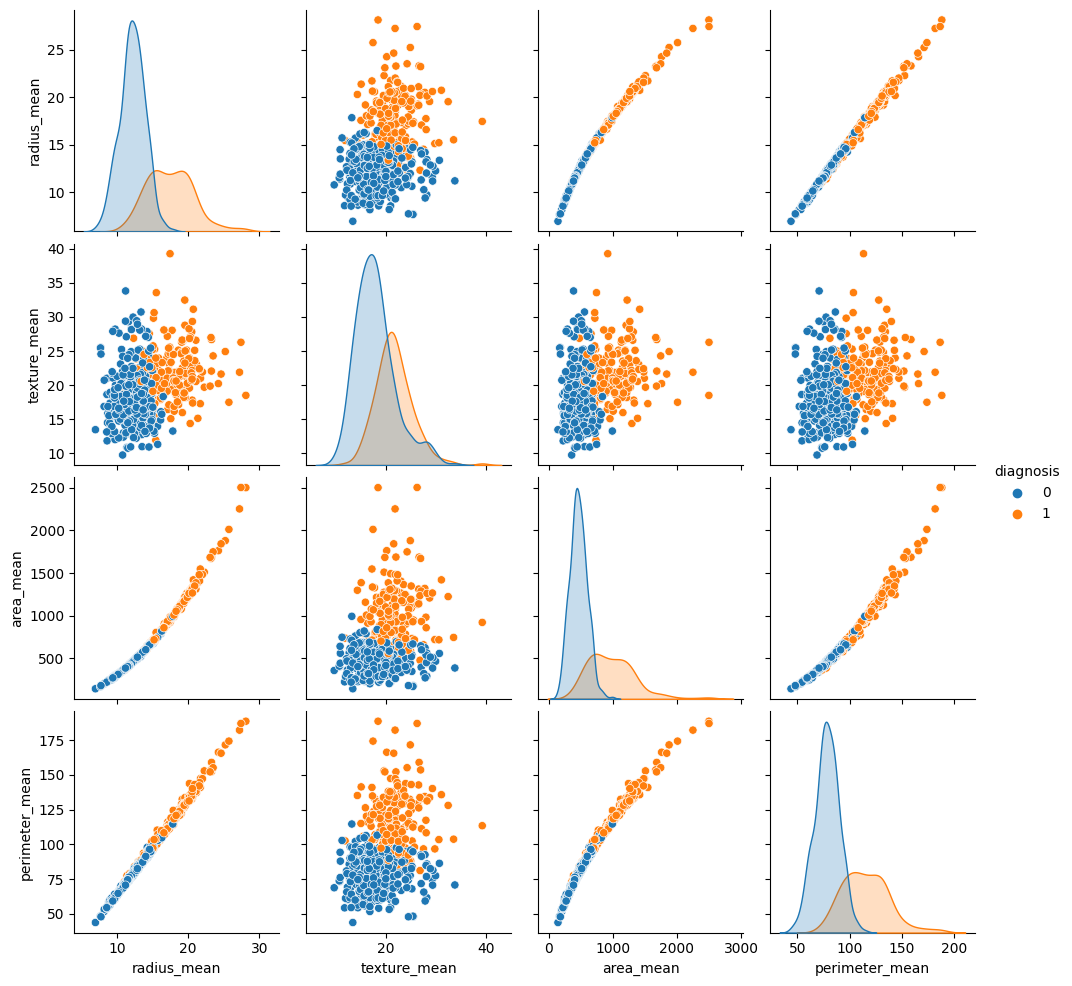

In [432]:
plt.figure(figsize=(22,6))
cols = ["diagnosis","radius_mean","texture_mean","area_mean","perimeter_mean"]
sns.pairplot(df[cols],hue='diagnosis')

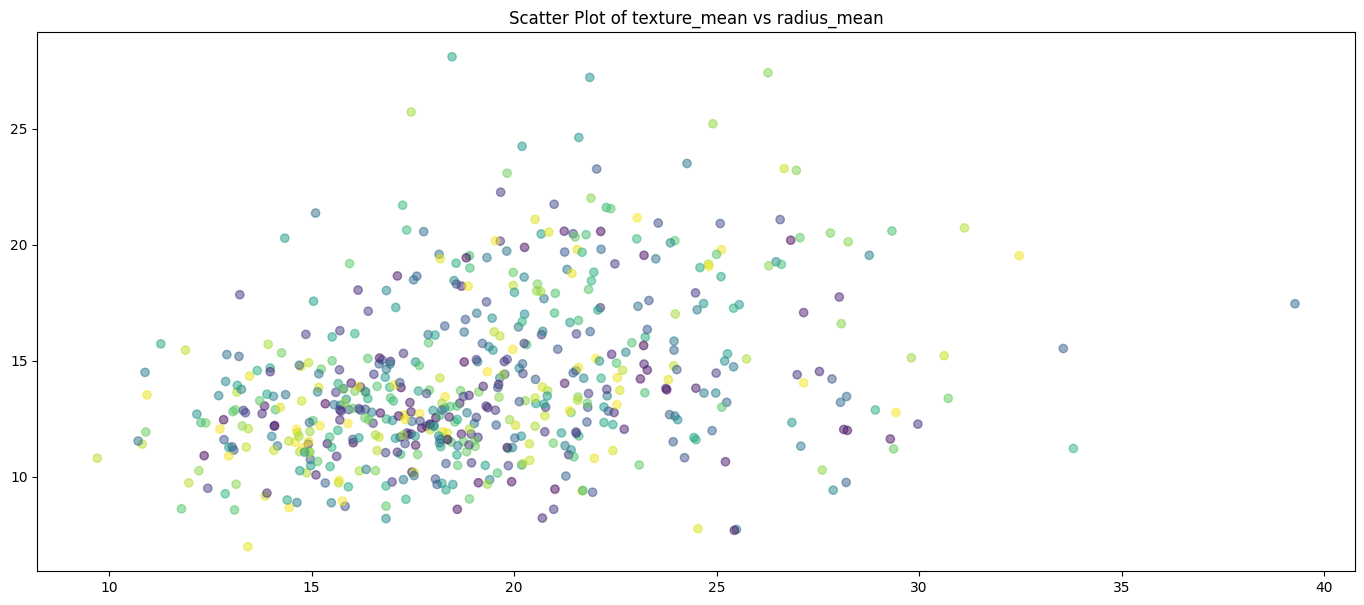

In [433]:
plt.figure(figsize=(17,7))
plt.xlabel=('texture_mean')
plt.ylabel=('radius_mean')
size=len(df['texture_mean'])
color = np.random.rand(size)
plt.scatter(df['texture_mean'],df['radius_mean'],c=color,alpha=0.5)
plt.title('Scatter Plot of texture_mean vs radius_mean')
plt.show()

In [434]:
cols = ['diagnosis','radius_mean','perimeter_mean','area_mean','compactness_mean','concavity_mean','texture_mean','concave points_mean','smoothness_mean', 'symmetry_mean', 'fractal_dimension_mean']
print(len(cols))
df[cols].corr()

11


,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,texture_mean,concave points_mean,smoothness_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.729376,0.741887,0.708389,0.595587,0.695648,0.422146,0.776369,0.356276,0.327336,-0.018099
radius_mean,0.729376,1.000000,0.997876,0.987344,0.505129,0.676557,0.329383,0.823165,0.168094,0.144236,-0.317749
perimeter_mean,0.741887,0.997876,1.000000,0.986548,0.555676,0.715662,0.335918,0.851338,0.204505,0.179100,-0.268103
area_mean,0.708389,0.987344,0.986548,1.000000,0.497981,0.686232,0.326193,0.824246,0.174838,0.148219,-0.288560
compactness_mean,0.595587,0.505129,0.555676,0.497981,1.000000,0.881619,0.252038,0.829050,0.657741,0.598095,0.560161
concavity_mean,0.695648,0.676557,0.715662,0.686232,0.881619,1.000000,0.315248,0.920462,0.519002,0.495525,0.329768
texture_mean,0.422146,0.329383,0.335918,0.326193,0.252038,0.315248,1.000000,0.305590,-0.017769,0.080146,-0.068771
concave points_mean,0.776369,0.823165,0.851338,0.824246,0.829050,0.920462,0.305590,1.000000,0.551009,0.457171,0.158464
smoothness_mean,0.356276,0.168094,0.204505,0.174838,0.657741,0.519002,-0.017769,0.551009,1.000000,0.555259,0.582435
symmetry_mean,0.327336,0.144236,0.179100,0.148219,0.598095,0.495525,0.080146,0.457171,0.555259,1.000000,0.475301


<Axes: title={'center': 'Correlation Graph'}>

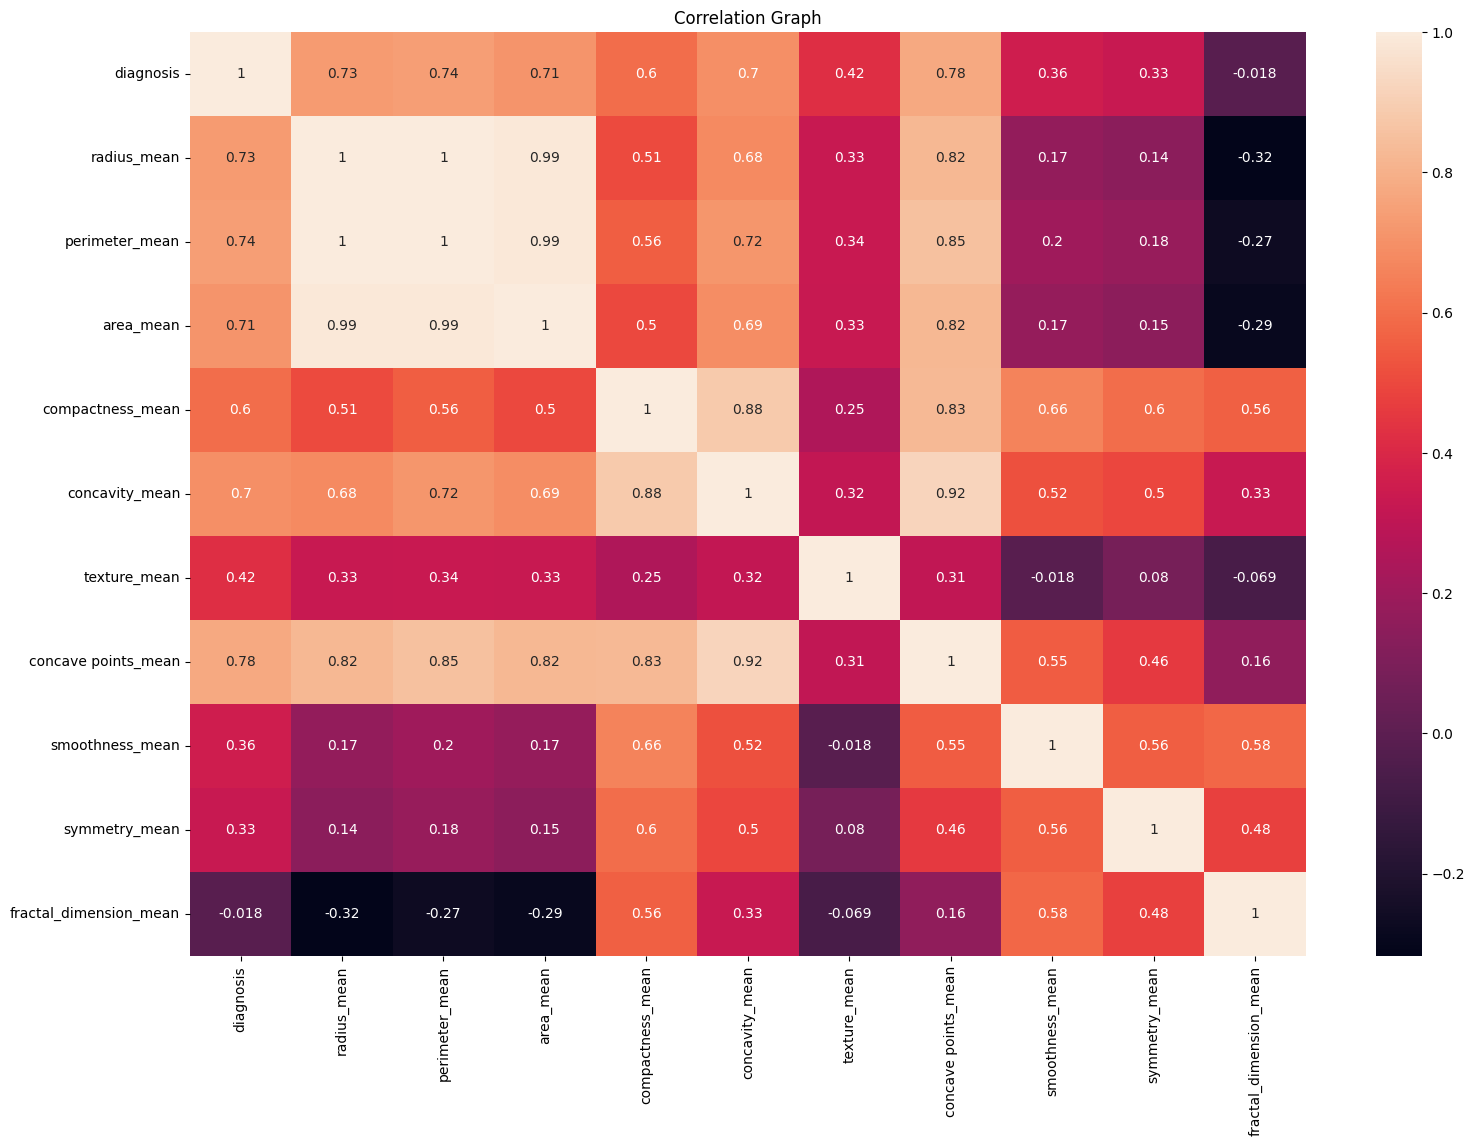

In [435]:
plt.figure(figsize=(18,12))

plt.title("Correlation Graph")


sns.heatmap(df[cols].corr(), annot=True)


# ***Splitting x and y***

In [436]:
x=df[["radius_mean",  'perimeter_mean', 'area_mean', 'symmetry_mean', 'compactness_mean', 'concave points_mean']]


In [437]:
x = df.drop("diagnosis",axis=1)
x

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [438]:
y=df["diagnosis"]
y

0      1
1      1
2      1
3      1
4      1
      ..
563    1
564    1
565    1
566    1
567    0
Name: diagnosis, Length: 568, dtype: int64

In [439]:
y=df[['diagnosis']]


In [440]:
def train_model(model, x_train, y_train, x_test, y_test):
    # Fit the model on the training data
    model.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    return y_pred, accuracy, conf_matrix, classification_rep

# ***Train test splitting***

In [442]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=121)

In [443]:
# normalize the variables
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [444]:
#importing algorithm
#hyperparamater tuning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV
warnings.filterwarnings("ignore")

In [445]:
# finding which algorithm is best for this dataset using hyperparameter tuning

log_score=cross_val_score(LogisticRegression(),X=x,y=y,cv=5)

svm_score=cross_val_score(SVC(),X=x,y=y)

rf_score=cross_val_score(RandomForestClassifier(random_state=15),x,y)

Ada_score=cross_val_score(AdaBoostClassifier(),x,y)

multi_score=cross_val_score(MultinomialNB(),x,y)

kn_score=cross_val_score(KNeighborsClassifier(n_neighbors=5),x,y)

In [446]:
print(log_score)

print(svm_score)

print(rf_score)

print(Ada_score)

print(multi_score)

print(kn_score)

[0.62280702 0.63157895 0.63157895 0.37168142 0.62831858]
[0.60526316 0.56140351 0.63157895 0.61061947 0.62831858]
[0.92105263 0.94736842 0.99122807 0.98230088 0.95575221]
[0.93859649 0.96491228 0.98245614 0.98230088 0.97345133]
[0.33333333 0.43859649 0.37719298 0.40707965 0.3539823 ]
[0.38596491 0.0877193  0.09649123 0.15929204 0.62831858]


In [447]:
#finding mean value

print(np.mean(log_score))

print(np.mean(svm_score))

print(np.mean(rf_score))

print(np.mean(Ada_score))

print(np.mean(multi_score))

print(np.mean(kn_score))

0.5771929824561404
0.6074367334264865
0.95954044403043
0.9683434249340165
0.38203695078403976
0.27155721161310353


In [448]:
# from here , we recognize  that "adaboost algorithm" is best for this dataset
# find best parameters using gridsearchcv
base_estimator = DecisionTreeClassifier()
ada = AdaBoostClassifier(base_estimator=base_estimator)

# Define a parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search on the training data
grid_search.fit(x_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 1.0, 'n_estimators': 100}


In [449]:
# Adaboost classifier
model = AdaBoostClassifier(n_estimators=200,
    learning_rate=.1,)
y_pred, accuracy, conf_matrix, classification_rep = train_model(model, x_train, y_train, x_test, y_test)

# Display results
print(f"Accuracy_score: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy_score: 0.97

Confusion Matrix:
[[67  1]
 [ 2 44]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        68
           1       0.98      0.96      0.97        46

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [451]:
# savig the model
import joblib
joblib.dump(model,'joblib_model')
new_model=joblib.load('joblib_model')